In [1]:
import os
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *

In [2]:
torch.cuda.set_device(6)

In [3]:
path = '/home/alao/ml/AgrilPlant_Dataset_2017'
# path = os.listdir('/home/ele_group_4/ml/Olaniyi/swl_data_split')

path

'/home/alao/ml/AgrilPlant_Dataset_2017'

In [ ]:
fnames = get_image_files(path)
fnames

In [ ]:
im = PILImage.create(fnames[2])
im.show()
im.size

In [ ]:
rsz = Resize(128, method=method)
#     show_image(rsz(img, split_idx=0), ctx=ax, title=method);
rd = rsz(im)
show_image(rd)
rd.size

In [ ]:
DataBlock.dataloaders??

# Build Datablocks and Train Model

In [4]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='train', valid_name='test'),
    get_y=parent_label,
    item_tfms=Resize(256))

In [5]:
dls = plants.dataloaders(path, bs=32)

# ResNet 34 Model

In [6]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.899400,0.110314,0.035000,0.965000,00:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.189655,0.065826,0.025000,0.975000,00:07
1,0.145802,0.051244,0.013333,0.986667,00:07
2,0.108401,0.065538,0.013333,0.986667,00:07
3,0.050416,0.033022,0.010000,0.990000,00:07
4,0.020703,0.027775,0.008333,0.991667,00:07


In [7]:
learn_res34.save('resnet-34')

Path('models/resnet-34.pth')

# Evaluate Model

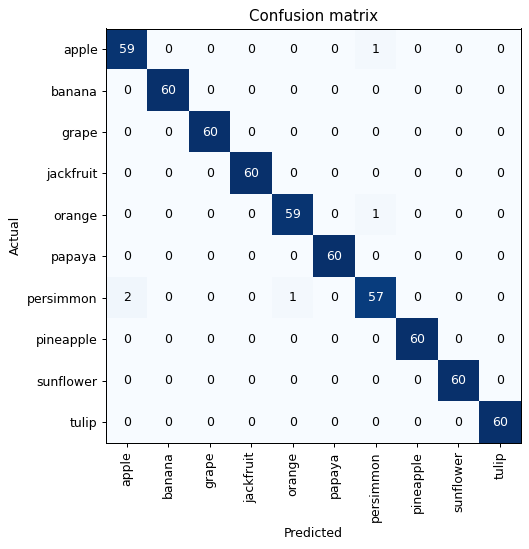

In [8]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [26]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

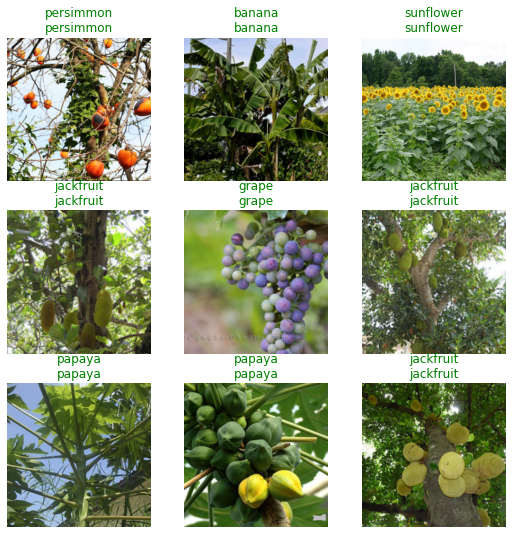

In [9]:
learn_res34.show_results()

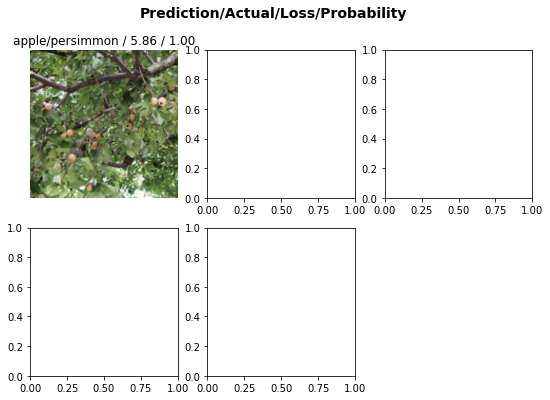

In [10]:

interp_res34.plot_top_losses(5)

# AlexNet Architecture

In [12]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.233104,0.347791,0.115000,0.885000,00:03


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.340661,0.179579,0.065000,0.935000,00:04
1,0.248254,0.158602,0.048333,0.951667,00:04
2,0.161055,0.105555,0.036667,0.963333,00:04
3,0.107066,0.116003,0.040000,0.960000,00:04
4,0.085274,0.114564,0.036667,0.963333,00:04


In [13]:
learn_alex.save('alexnet')

Path('models/alexnet.pth')

# Evaluate Model

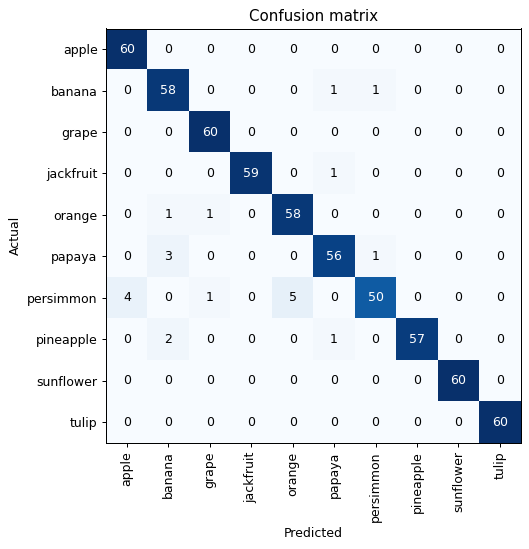

In [14]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [30]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

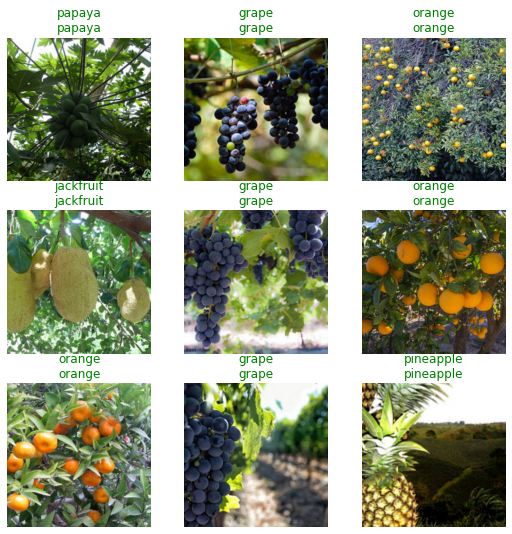

In [15]:
learn_alex.show_results()

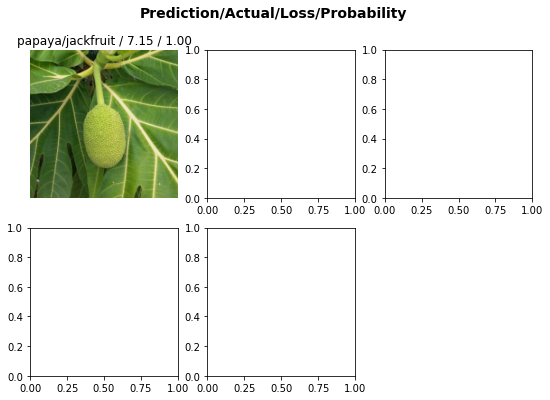

In [16]:

interp_alex.plot_top_losses(5)

In [ ]:
cnn_learner??

# ResNet 152 Architecture

In [17]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.519453,0.148650,0.046667,0.953333,00:21


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.155890,0.097091,0.030000,0.970000,00:28
1,0.161418,0.156440,0.043333,0.956667,00:28
2,0.104597,0.025385,0.005000,0.995000,00:28
3,0.045192,0.027020,0.011667,0.988333,00:28
4,0.032413,0.018842,0.006667,0.993333,00:27


In [18]:
learn_res152.save('resnet-152')

Path('models/resnet-152.pth')

# Evaluate Model

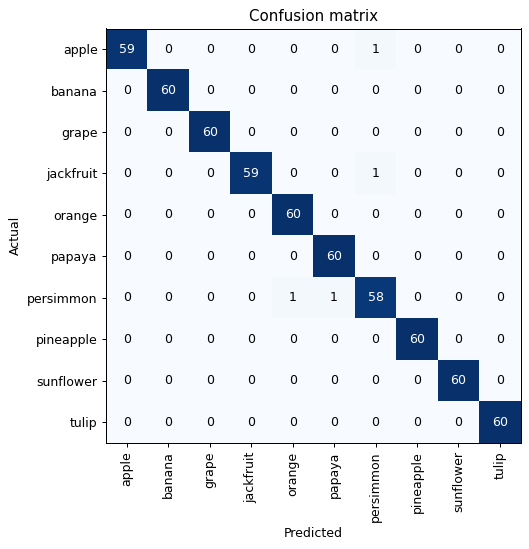

In [19]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [31]:
learn_res152.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

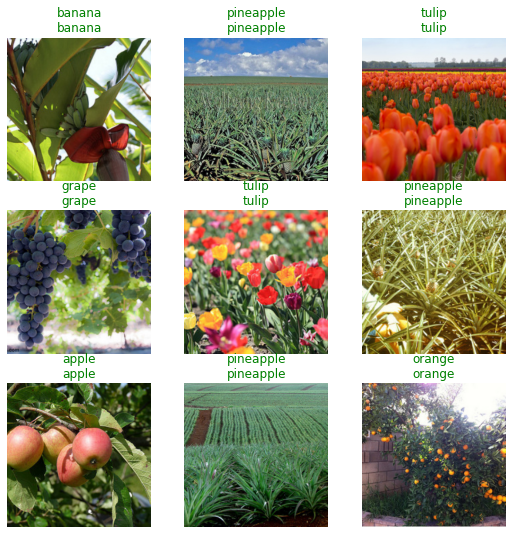

In [20]:
learn_res152.show_results()

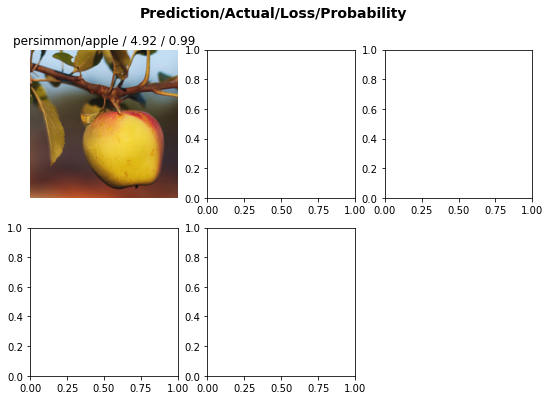

In [21]:

interp_res152.plot_top_losses(5)

# ResNet 101 Architecture

In [22]:

learn_res101 = cnn_learner(dls, resnet101, metrics=(error_rate, accuracy))
learn_res101.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.531036,0.127597,0.045000,0.955000,00:16


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.168897,0.122918,0.045000,0.955000,00:21
1,0.157169,0.083495,0.025000,0.975000,00:20
2,0.110756,0.063344,0.018333,0.981667,00:20
3,0.068347,0.033622,0.010000,0.990000,00:20
4,0.028895,0.030996,0.010000,0.990000,00:20


In [23]:
learn_res101.save('resnet-101')

Path('models/resnet-101.pth')

# Evaluate Model

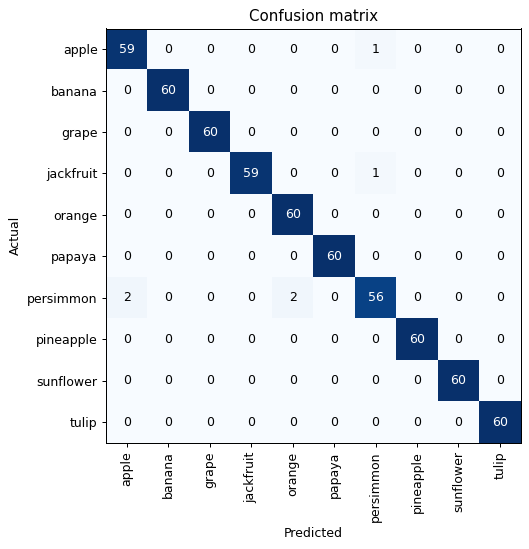

In [24]:

interp_res101 = ClassificationInterpretation.from_learner(learn_res101)
interp_res101.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [32]:
learn_res101.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

# ResNet 50 Architecture

In [25]:

learn_res50a = cnn_learner(dls, resnet50, metrics=(error_rate, accuracy))
learn_res50a.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.537156,0.154249,0.028333,0.971667,00:11


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.145485,0.158280,0.048333,0.951667,00:13
1,0.169723,0.101597,0.030000,0.970000,00:14
2,0.102104,0.052407,0.016667,0.983333,00:14
3,0.047639,0.033971,0.008333,0.991667,00:13
4,0.024310,0.029857,0.008333,0.991667,00:13


In [27]:
learn_res50a.save('resnet-50')

Path('models/resnet-50.pth')

# Evaluate Model

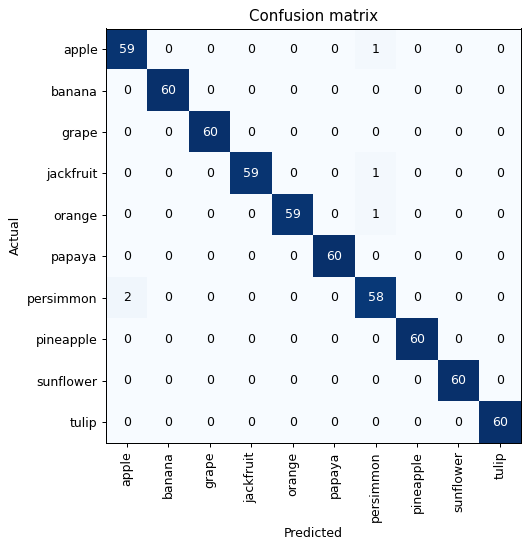

In [28]:

interp_res50a = ClassificationInterpretation.from_learner(learn_res50a)
interp_res50a.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [33]:
learn_res50a.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        

# ResNet 18 Architecture

In [29]:

learn_res18 = cnn_learner(dls, resnet18, metrics=(error_rate, accuracy))
learn_res18.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.888880,0.149154,0.051667,0.948333,00:06


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.194410,0.108840,0.035000,0.965000,00:08
1,0.134153,0.159314,0.046667,0.953333,00:07
2,0.088587,0.086684,0.021667,0.978333,00:08
3,0.050471,0.078658,0.016667,0.983333,00:07
4,0.034429,0.072555,0.018333,0.981667,00:07


In [34]:
learn_res18.save('resnet-18')

Path('models/resnet-18.pth')

# Evaluate Model

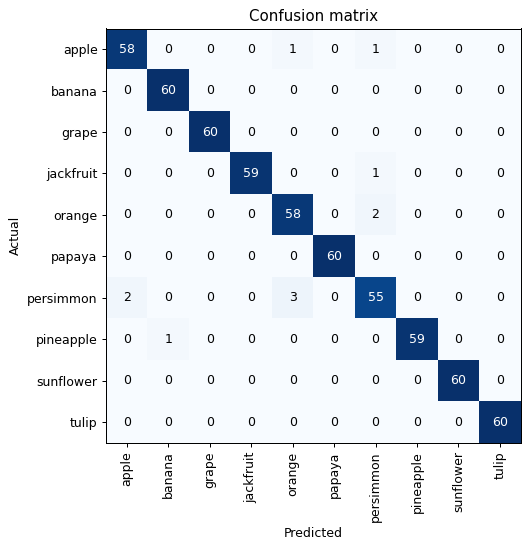

In [35]:

interp_res18 = ClassificationInterpretation.from_learner(learn_res18)
interp_res18.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [36]:
learn_res18.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# Make prediction

In [ ]:

# hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

In [ ]:

img = PILImage.create(uploader.data[0])
is_apple,_,probs = learn.predict(img)
print(f"What is this?: {is_apple}.With a probability of: ")


# Fine tune Model

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 6.309573450380412e-07)

# Alex Architecture

In [ ]:

alex_learn = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
alex_learn.fine_tune(4)

# Evaluate Model

In [ ]:

alex_interp = ClassificationInterpretation.from_learner(alex_learn)
alex_interp.plot_confusion_matrix()

In [ ]:
alex_learn.lr_find()

In [ ]:
alex_learn.show_results()

In [ ]:

alex_interp.plot_top_losses(5)

In [ ]:
#hide_output
uploader = widgets.FileUpload()
uploader

In [ ]:

img = PILImage.create(uploader.data[0])
is_apple,_,probs = alex_learn.predict(img)
print(f"Is this a banana?: {is_apple}.")
